In [24]:
from typing import List
import numpy as np
import openfermion as of
import quimb
import quimb.tensor as qtn
from tensor_network_common import pauli_sum_to_mpo, mps_to_vector
import matplotlib.pyplot as plt

In [5]:
max_mpo_bond = 500
max_mps_bond = 10

In [6]:
hamiltonian_file = "data/monomer_eqb"
hamiltonian = of.jordan_wigner(
        of.get_fermion_operator(
    of.chem.MolecularData(filename=hamiltonian_file).get_molecular_hamiltonian()
    )
)
ham_cirq = of.transforms.qubit_operator_to_pauli_sum(hamiltonian)
qs = ham_cirq.qubits
nq = len(qs)
ham_mpo = pauli_sum_to_mpo(ham_cirq, qs, max_mpo_bond)

# Get an approximate ground state using DMRG.
dmrg = qtn.tensor_dmrg.DMRG(ham_mpo, max_mps_bond)
converged = dmrg.solve()
if not converged:
    print("DMRG did not converge!")
ground_state = dmrg.state
ground_state_vec = mps_to_vector(ground_state)
ground_energy = dmrg.energy.real
quimb.save_to_disk(ground_state, "data/water_mps.dump")
print(f"Final DMRG energy: {ground_energy:4.5e}")

sorted_inds = ['k0', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k13']
Final DMRG energy: -7.57287e+01


/Users/benjamindalfavero/.venv/compare/lib/python3.13/site-packages/cotengra/hyperoptimizers/hyper.py:55: UserWarning: Couldn't find `optuna`, `cmaes`, or `nevergrad` so will use completely random sampling in place of hyper-optimization. It is recommended to install one of these libraries for higher quality contraction paths.
  warnings.warn(
/Users/benjamindalfavero/.venv/compare/lib/python3.13/site-packages/autoray/autoray.py:81: RuntimeWarning: divide by zero encountered in matmul
  return func(*args, **kwargs)
/Users/benjamindalfavero/.venv/compare/lib/python3.13/site-packages/autoray/autoray.py:81: RuntimeWarning: overflow encountered in matmul
  return func(*args, **kwargs)
/Users/benjamindalfavero/.venv/compare/lib/python3.13/site-packages/autoray/autoray.py:81: RuntimeWarning: invalid value encountered in matmul
  return func(*args, **kwargs)
/Users/benjamindalfavero/.venv/compare/lib/python3.13/site-packages/autoray/autoray.py:81: RuntimeWarning: divide by zero encountered in 

In [20]:
def int_list_to_int(int_list: List[int]) -> int:
    """Convert a sequence of integers representing a spin config
    into an integer label as for the computational basis,
    e.g. [1, 1, 0] -> 6, [0, 0, 1] -> 1."""

    total = 0
    for i, bit in enumerate(reversed(int_list)):
        assert bit in [0, 1]
        total += bit * 2 ** i
    return total

In [21]:
print(int_list_to_int([1, 1, 0]))

6


In [23]:
samples = ground_state.sample(10_000)

config_ints = []
for config, omega in samples:
    config_int = int_list_to_int(config)
    config_ints.append(config_int)

(array([1.600e+01, 1.000e+00, 9.000e+00, 8.000e+00, 0.000e+00, 2.100e+01,
        7.000e+00, 7.300e+01, 7.100e+01, 9.794e+03]),
 array([13299. , 13605.9, 13912.8, 14219.7, 14526.6, 14833.5, 15140.4,
        15447.3, 15754.2, 16061.1, 16368. ]),
 <BarContainer object of 10 artists>)

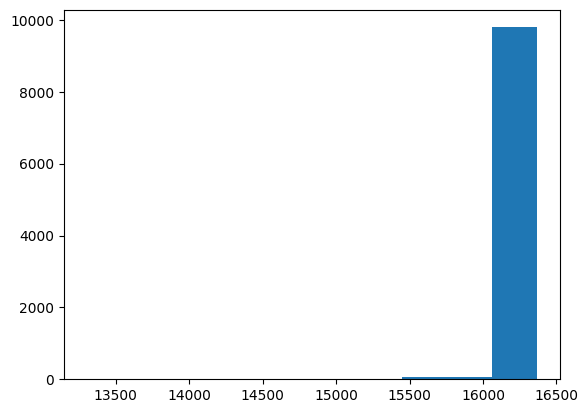

In [25]:
fig, ax = plt.subplots()
ax.hist(config_ints)